In [1]:
## Import Packages / Setup the matplotlib configuration

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer


plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

np.random.seed(42)
pd.options.mode.chained_assignment = None

In [2]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df_train.isna().sum().replace(0, np.nan).dropna()

LotFrontage      259.0
Alley           1369.0
MasVnrType         8.0
MasVnrArea         8.0
BsmtQual          37.0
BsmtCond          37.0
BsmtExposure      38.0
BsmtFinType1      37.0
BsmtFinType2      38.0
Electrical         1.0
FireplaceQu      690.0
GarageType        81.0
GarageYrBlt       81.0
GarageFinish      81.0
GarageQual        81.0
GarageCond        81.0
PoolQC          1453.0
Fence           1179.0
MiscFeature     1406.0
dtype: float64

In [5]:
df_train_filtered = df_train.loc[:, ~df_train.columns.isin(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])]
df_train_filtered

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [6]:
df_train_filtered['MSSubClass'] = df_train_filtered['MSSubClass'].astype('object')

In [7]:
class preProcessor:
    def __init__(self, OneHotEncoder):
        self.OneHotEncoder = OneHotEncoder
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X):
        X_filtered = X.loc[:, ~X.columns.isin(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])]
        
        X_num = X_filtered.loc[:, X_filtered.dtypes != 'object']
        X_cat = X_filtered.loc[:, X_filtered.dtypes == 'object']
        
        X_num = SimpleImputer(strategy = 'mean').fit_transform(X_num)
        X_cat = SimpleImputer(strategy = 'most_frequent').fit_transform(X_cat)
        return np.concatenate((X_num, self.OneHotEncoder.transform(X_cat).toarray()), axis = 1)        

In [8]:
X = df_train.loc[:,df_train.columns!='SalePrice']
y = df_train['SalePrice']

X_filtered = X.loc[:, ~X.columns.isin(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'])]
        
X_cat = X_filtered.loc[:, X_filtered.dtypes == 'object']
X_cat = SimpleImputer(strategy = 'most_frequent').fit_transform(X_cat)

In [9]:
_OneHotEncoder = OneHotEncoder().fit(X_cat)
_preProcessor = preProcessor(_OneHotEncoder)

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


models = [
    # ('LR', LinearRegression()),
    ('GB', GradientBoostingRegressor()),
    ('ADA', AdaBoostRegressor()),
    # ('MLP', MLPRegressor(max_iter = 2000)),
    ('KN', KNeighborsRegressor()),
    ('RF', RandomForestRegressor()),
    ('DTR', DecisionTreeRegressor()),
]

num_folds = 10

X = df_train.loc[:,df_train.columns!='SalePrice']
y = df_train['SalePrice']

names = [n for (n,m) in models]
kfold_results = []

for i, md in enumerate(models):
    models[i] = Pipeline([('preProcess', _preProcessor), md])

for i, model in enumerate(models):
    print(f'{names[i]} started')
    kfold_results.append(-cross_val_score(model, X, y, cv = num_folds, scoring = 'neg_root_mean_squared_error'))

GB started
ADA started
KN started
RF started
DTR started


In [11]:
kfold_results

[array([21172.01589944, 25240.68758695, 19977.33862274, 38715.33580459,
        29383.27631788, 25801.23675784, 26431.17275435, 21666.25673123,
        29017.03610517, 24736.53936805]),
 array([28324.71511618, 31834.38492967, 30115.62387822, 44487.8466017 ,
        38613.41020839, 34483.81327935, 32090.09249876, 32233.08140625,
        45269.13280782, 33023.49422963]),
 array([37844.48646469, 47670.7965977 , 42865.73266766, 45131.14841587,
        59173.46320042, 40903.41457469, 39197.67473046, 38270.619682  ,
        63750.30411447, 42593.494309  ]),
 array([25030.10370881, 26122.47979578, 21710.9411286 , 40595.90107245,
        32558.29724285, 25284.03273435, 24246.82452223, 23035.49246636,
        39382.26224124, 27155.7044847 ]),
 array([36578.51628834, 39240.36865619, 30577.54547833, 44627.27783673,
        40717.02696317, 28040.17795204, 31059.31690242, 35174.51600664,
        58417.2978194 , 37095.55899176])]

[Text(1, 0, 'GB'),
 Text(2, 0, 'ADA'),
 Text(3, 0, 'KN'),
 Text(4, 0, 'RF'),
 Text(5, 0, 'DTR')]

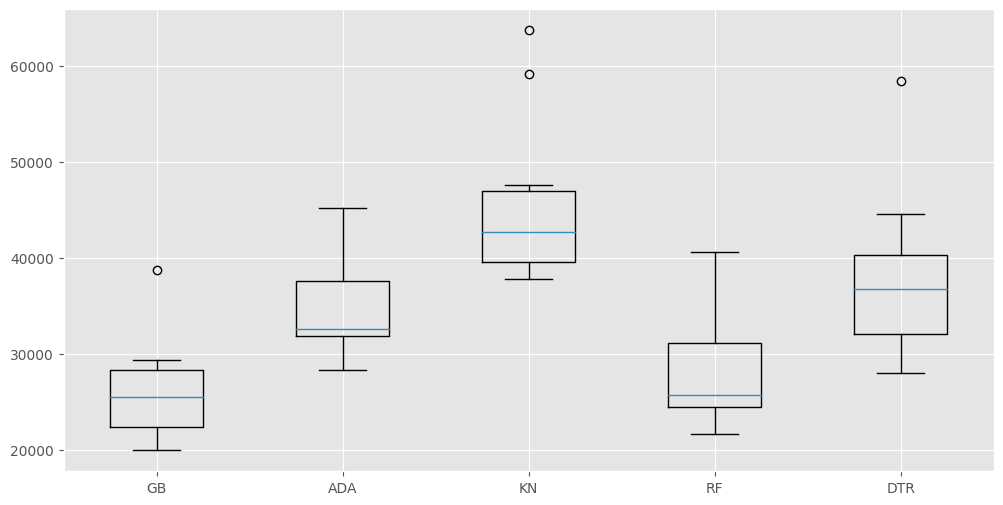

In [12]:
fig, ax = plt.subplots()
ax.boxplot(list(kfold_results))
ax.set_xticklabels(names)

In [13]:
GB = Pipeline([('preProcess', _preProcessor), ('GB', GradientBoostingRegressor())])

parameters = {
    'GB__learning_rate' : np.logspace(-3,0,4),
    'GB__n_estimators' : np.linspace(1,20,20, dtype = int)
}

clf = GridSearchCV(GB, parameters, cv = 5, scoring = 'neg_root_mean_squared_error', verbose = 1)
clf.fit(X, y)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preProcess',
                                        <__main__.preProcessor object at 0x7f4bfc734450>),
                                       ('GB', GradientBoostingRegressor())]),
             param_grid={'GB__learning_rate': array([0.001, 0.01 , 0.1  , 1.   ]),
                         'GB__n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             scoring='neg_root_mean_squared_error', verbose=1)

In [14]:
best_params = clf.best_params_
best_params

{'GB__learning_rate': 1.0, 'GB__n_estimators': 16}

In [15]:
GB = Pipeline([('preProcess', _preProcessor), ('GB', GradientBoostingRegressor(**{k.replace('GB__', '') : best_params[k] for k in best_params}))])
GB.fit(X, y)
df_test['SalePrice'] = GB.predict(df_test)
df_test.loc[:,['Id', 'SalePrice']].to_csv('result.csv', index = False)

In [16]:
pd.read_csv('result.csv')

,Id,SalePrice
0,1461,126070.577679
1,1462,149055.041462
2,1463,169283.094350
3,1464,208701.583801
4,1465,177738.631456
...,...,...
1454,2915,85057.891475
1455,2916,91006.223439
1456,2917,166185.375886
1457,2918,91209.127335
